<a href="https://colab.research.google.com/github/wf-yamaday/machine-learning/blob/master/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%BB%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E8%AB%96/report/report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pylab as plt

import sklearn

In [0]:
# データの生成
N = 10

pltxrng=(0, 1.0)
pltyrng=(-1.2, 1.2)

np.random.seed(12345)
x = np.random.uniform(low=0.0, high=1.0, size=N)
sgm = 0.2

def truemodel(x): 
    '''真のモデル'''
    return 0.8*x
  
y0 = truemodel(x)
eps = np.random.randn(N) * sgm
y = y0 + eps # 観測データ

d = pd.DataFrame({'x': x, 'y0': y0, 'y': y})


Text(0.5, 1.0, 'Observed')

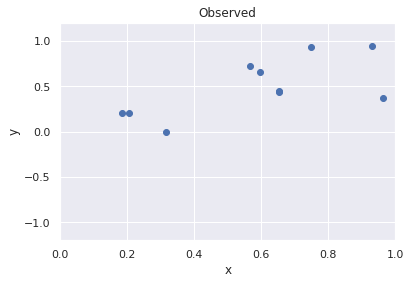

In [0]:
# 観測データを表示させてみる
plt.figure()

plt.plot(x, y, 'bo')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(pltxrng[0], pltxrng[1])
plt.ylim(pltyrng[0], pltyrng[1])

plt.title('Observed')


In [0]:
# 真値の曲線データも作成しておこう
xx = np.linspace(pltxrng[0], pltxrng[1], 128)
yytrue = truemodel(xx)

Text(0.5, 1.0, 'Observed + Ideal')

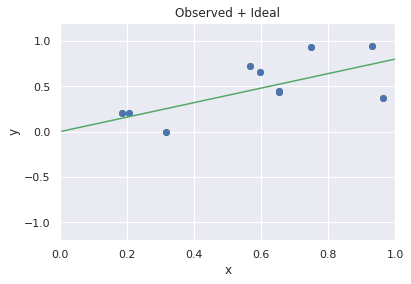

In [0]:
# とりあえず　表示と保持

plt.scatter(data=d, x='x', y='y', c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(pltxrng[0], pltxrng[1])
plt.ylim(pltyrng[0], pltyrng[1])

plt.plot(x, y, 'bo')
plt.plot(xx, yytrue, 'g-')

plt.title('Observed + Ideal')

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Residual(00): 9.118197e-02
Residual(01): 4.954181e-02
Residual(02): 4.400242e-02


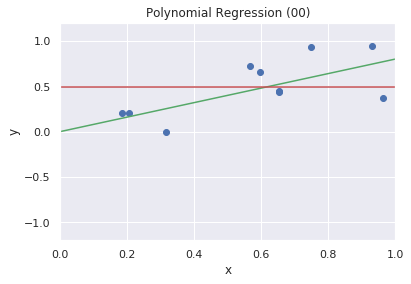

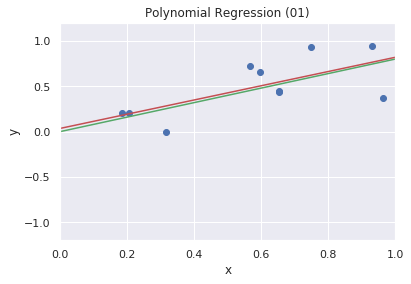

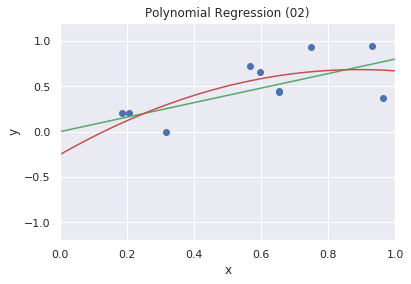

In [0]:
M = 3

def MeanSquareAverage(ypred, yref):
    return np.mean((ypred - yref)**2)

w = np.zeros((M, M))
Res = []
PRM = []
for m in range(M):
    model = Pipeline([('poly', PolynomialFeatures(degree=m)), ('linear', LinearRegression(fit_intercept=True))])
    model.fit(d['x'][:, np.newaxis], d['y'])
    
    plt.figure()
    plt.scatter(data=d, x='x', y='y', c='b')
    plt.plot(xx, yytrue, 'g-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(pltxrng[0], pltxrng[1])
    plt.ylim(pltyrng[0], pltyrng[1])

    yy = model.predict(xx[:, np.newaxis])
    PRM.append(model.predict(d['x'][:, np.newaxis]))
    rtrain = MeanSquareAverage(model.predict(d['x'][:, np.newaxis]), d['y'])
    print('Residual(%02d): %8e' % (m, rtrain) )
    Res.append(rtrain)

    plt.plot(xx, yy, 'r-')
    plt.title('Polynomial Regression (%02d)' % (m))

    
    # 係数を引っ張りだす．pipeline は，steps に処理のオブジェクトが入っている．
    # 線形基底関数は 2番目のステップなので [1] 番目のリスト．取りだすと，
#     print(model.steps[1][1].intercept_)
#     print(model.steps[1][1].coef_)
    
    w[m, 0] = model.steps[1][1].intercept_
    w[m, 1:1+m] = model.steps[1][1].coef_[1:]

In [0]:
# 別データを生成する
N = 5

pltxrng=(0, 1.0)
pltyrng=(-1.2, 1.2)

np.random.seed(12345)
x = np.random.uniform(low=0.0, high=1.0, size=N)

y0 = truemodel(x)
eps = np.random.randn(N) * sgm
y = y0 + eps # 観測データ

d = pd.DataFrame({'x': x, 'y0': y0, 'y': y})

In [0]:
# 新しく生成したデータでの誤差
for m in range(M):
  yy = w[m, 0] + w[m, 1]*x**1 +w[m, 2]*x**2
  rtrain = MeanSquareAverage(yy, y)
  print('Residual(%02d): %8e' % (m, rtrain) )

Residual(00): 4.999100e-02
Residual(01): 2.334306e-02
Residual(02): 3.411512e-02


# データからのモデル選択の手順

予測して得られたモデルの誤差が小さいからと言って安易に得られたモデルを採用すべきではない．
今回の実験で用いた10個のデータセットから得られた回帰曲線（直線）での予測値と観測値の誤差は以下のようになっている．

> Residual(00): 9.118197e-02  
> Residual(01): 4.954181e-02  
> Residual(02): 4.400242e-02  

誤差からみると，2次の多項式モデルの当てはまりが良いように感じるが，図で見ると真の直線とは異なっている．
図から判断すると，1次の多項式モデルの方が当てはまりが良いと考えられる．
しかしこれは今回は真の直線を知っているためであり，未知のデータに対してはこれは現実的ではない．

実際は観測データを学習用と評価用に分け，生成したモデルでの評価用データへの当てはまり具合で判断するのが妥当である．
それは今回の実験の後半での新たに5件のデータを生成し，誤差を求めたのにも通じる．
新たに生成した5件のデータとモデルによる予測値との誤差は以下のようになっている．

> Residual(00): 4.999100e-02  
> Residual(01): 2.334306e-02  
> Residual(02): 3.411512e-02

この実験では，1次の多項式モデルの方が誤差が小さいことが確認できる．

しかしながらデータによっては事前のデータの分け方に依存することも考えられる．
そのような場合には，データをあらかじめに分割し，学習用と評価用の組み合わせのパターンを全て検証し，データの分割の仕方に依存しないことを検証する交差検証を行うことでモデルを評価すべきである．
そうして精度の高いモデルを選択するのがモデルを選択する上での良い手順だと考えられる．